# An Exploratory Data Analysis (EDA) of the Kaggle Home Price Data

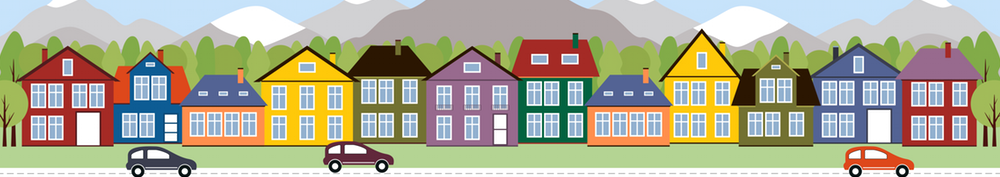

In [1]:
#!pip install pypng
from PIL import Image
Image.open('housesbanner.png')

We will look at each variable and use visualisation and quantitative methods to do a philosophical analysis of their meaning and importance for this problem before diving into machine learning or statistical modeling.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from collections import Counter
import math 
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Download and Load Data File

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. The data split in two-part train and test. The training dataset has target value (home price), the test set doesn't have a target value and it needs to be predicted.

**File descriptions:**

*train.csv - the training set

*test.csv - the test set

*data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

*sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

In [3]:
df= pd.read_csv('train.csv')
print (df.shape)

(1460, 81)


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We want to save the 'Id' columns from both datasets for later use when preparing the submission data.

The data has 79 columns (features) and 1460 entries. We will look in the data description file.

In [5]:
df=df.iloc[:,1:81]

In [6]:
f=open('data_description.txt', 'r')
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
# check the columns
names=df.columns
print(names)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Before looking at each variable we will check missing values.

In [8]:
df.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

We will analyze the missing values for each variables.

# 2. Data Preparation

Since our target value is the sale price, we will first look into Sale Price. We will look data type, min max and visualize the histogram to see if it shows normal distribution behave.

# *SalePrice*

In [9]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

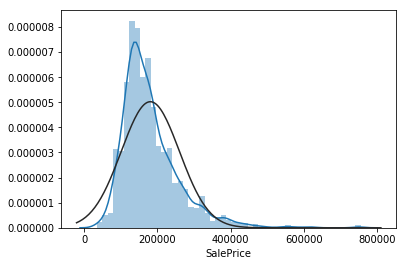

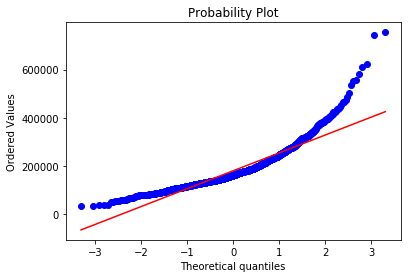

In [10]:
#histogram
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

The 'SalePrice' is not showing normal distribution behave. It shows positive (right) skewness and does not follow the diagonal line. We will transform the data to solve problem. Log transformations usually works well. 

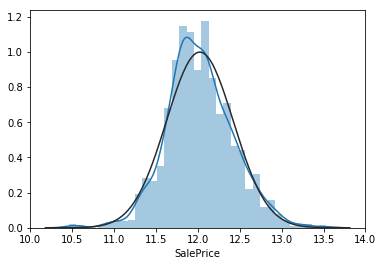

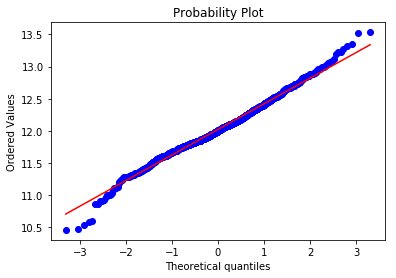

In [11]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])
#histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

# *1stFlrSF*

First Floor square feet

We will apply log transformation and change the column name as "FrstFlrSF" due to transforming in .csv file. We would like to have columns name without numbers to reduce errors when we will loading the data

In [12]:
df['FrstFlrSF'] = np.log(df['1stFlrSF'])
df=df.drop(columns=['1stFlrSF'])

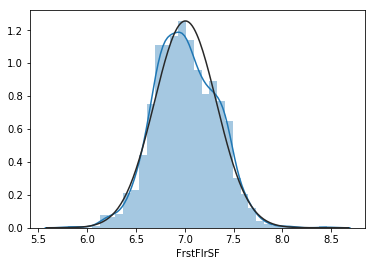

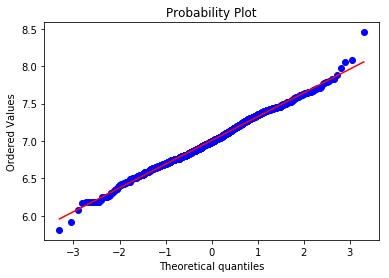

In [13]:
#histogram and normal probability plot
sns.distplot((df['FrstFlrSF']), fit=norm);
fig = plt.figure()
res = stats.probplot(df['FrstFlrSF'], plot=plt)

# *2ndFlrSF*
Second floor square feet

I will drop 2ndFlrSF becouse most of them missing

In [14]:
df=df.drop(columns=['2ndFlrSF'])

# *LowQualFinSF*
Low quality finished square feet (all floors)

Most values 0 so I will remove that column

In [15]:
df[df['LowQualFinSF']==0]['LowQualFinSF'].count()

1434

In [16]:
df=df.drop(columns=['LowQualFinSF'])

# *LotFrontage*
Linear feet of street connected to property

In [17]:
df['LotFrontage'].isna().sum()

259

There are 259 missing values. Replacing the missing values with the mean / median / mode is a crude way of treating missing values. Depending on the context, like if the variation is low or if the variable has low leverage over the response, such a rough approximation is acceptable and could possibly give satisfactory results.

To fix the missing value problem, we will fill in those locations with the median due to impact of the outliers.

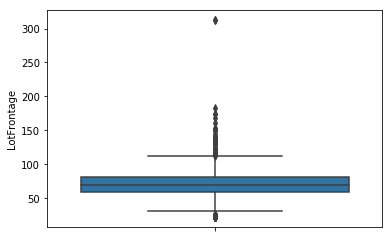

In [18]:
sns.boxplot(df[~np.isnan(df['LotFrontage'])]['LotFrontage'], orient='v' )

In [19]:
print (df['LotFrontage'].describe())
print(df['LotFrontage'].median())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
69.0


In [20]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

# *LotArea*
Lot size in square feet


In [21]:
df[['LotArea']]=np.sqrt(df[['LotArea']])

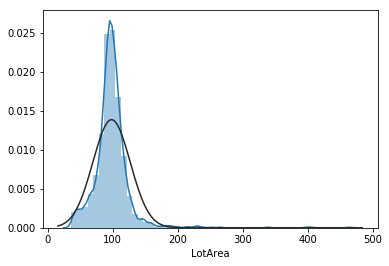

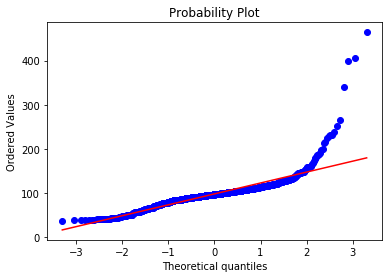

In [22]:
sns.distplot(df['LotArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['LotArea'], plot=plt)

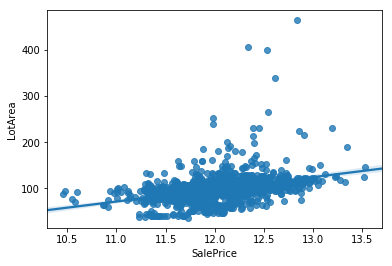

In [23]:
ax = sns.regplot(x="SalePrice", y="LotArea", data=df)

This will be a very important feature within my analysis, due to such a high correlation with Saleprice.

# *GrLivArea*
Above grade (ground) living area square feet


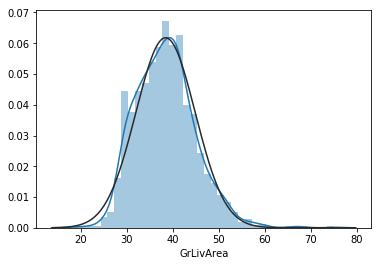

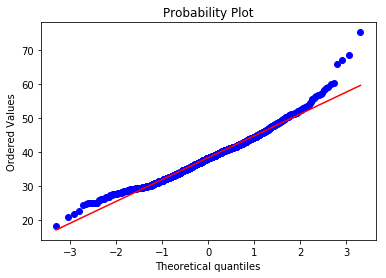

In [24]:
sns.distplot(np.sqrt(df['GrLivArea']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.sqrt(df['GrLivArea']), plot=plt)

In [25]:
df['GrLivArea']=np.sqrt(df['GrLivArea'])

# *'MasVnrArea'*
Masonry veneer area in square feet

In [26]:
print ('missing Values')
print(df['MasVnrArea'].isna().sum())
print ('Values=0')
print(df[df['MasVnrArea']==0]['MasVnrArea'].count())

missing Values
8
Values=0
861


In [27]:
df[df['MasVnrArea']==0]['MasVnrArea'].count()

861

There are 5 missing values and 861 values are 0. We need to check 0 values. We will look at the 'MasVnrType' to fill vlues which equal to 0.

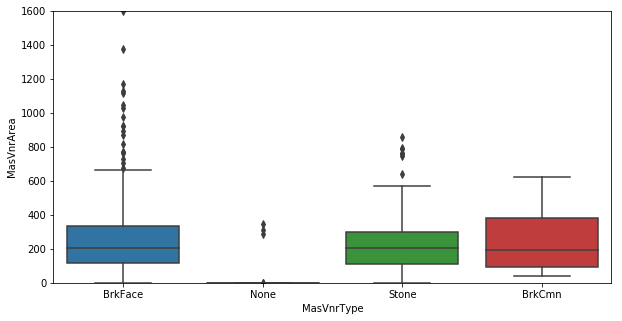

In [28]:
#box plot overallqual/saleprice
var = 'MasVnrType'
data = pd.concat([df['MasVnrArea'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y='MasVnrArea', data=df)
fig.axis(ymin=0, ymax=1600);

it is highly correlated with "MasVnrType" (if "MasVnrType = "None" then it has to be equal to 0). So, I will drop this feature.

In [29]:
df=df.drop(columns=['MasVnrArea'])

# *MasVnrType*
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [30]:
print("na Valuest")
print(df['MasVnrType'].isna().sum())

na Valuest
8


The 8 values of variable are na so I will fill na as 0

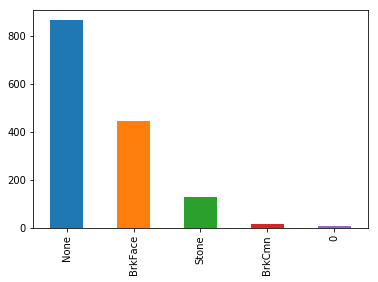

In [31]:
# I will fill na as 0
df['MasVnrType']=df['MasVnrType'].fillna(0)
pd.Series(df['MasVnrType']).value_counts().plot('bar')

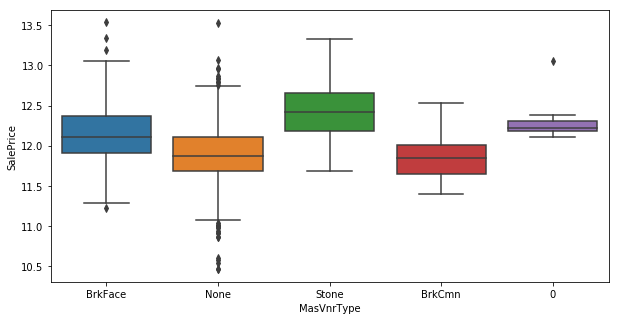

In [32]:
#box plot overallqual/saleprice
var = 'MasVnrType'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y='SalePrice', data=df)

Since this a categorical feature without order, I will create dummy features here.

In [33]:
cleanup_nums = {"MasVnrType":     {"None": 1, "BrkFace": 2, "Stone":3, "BrkCmn":4}}
df.replace(cleanup_nums, inplace=True)  

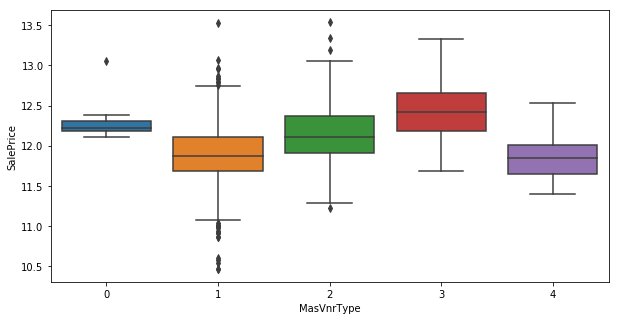

In [34]:
#box plot 
var = 'MasVnrType'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y='SalePrice', data=df)

# *BsmtFinSF1*
Type 1 finished square feet

we would like to see if there is any coralation between 'BsmtFinSF1' and 'BldgType'

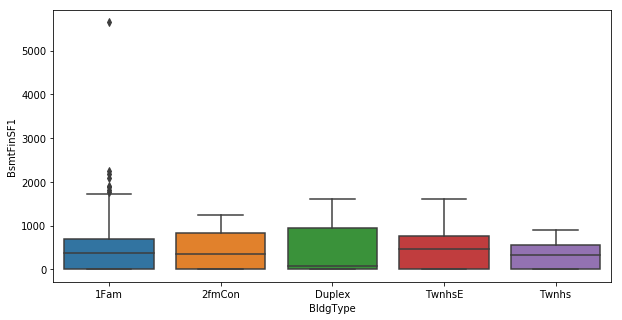

In [35]:
#box plot 
var = 'BldgType'
data = pd.concat([df['BsmtFinSF1'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y='BsmtFinSF1', data=df)

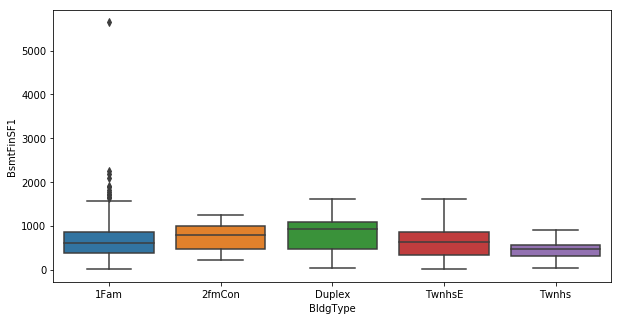

In [36]:
#box plot 
var = 'BldgType'
data = pd.concat([df[df['BsmtFinSF1']>0]['BsmtFinSF1'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y=df[df['BsmtFinSF1']>0]['BsmtFinSF1'], data=df)

In [37]:
print ('missing Values')
print(df['BsmtFinSF1'].isna().sum())
print ('Values=0')
print(df[df['BsmtFinSF1']==0]['BsmtFinSF1'].count())

missing Values
0
Values=0
467


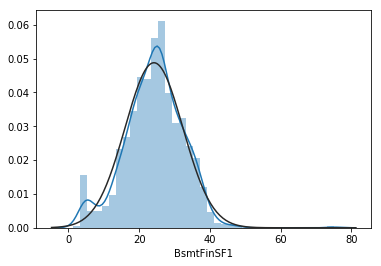

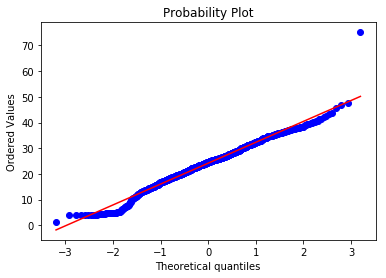

In [38]:
#histogram and normal probability plot
sns.distplot(np.sqrt(df[df['BsmtFinSF1']>0]['BsmtFinSF1']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.sqrt(df[df['BsmtFinSF1']>0]['BsmtFinSF1']), plot=plt)

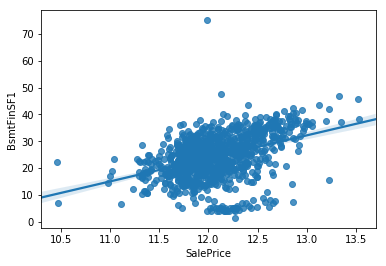

In [39]:
ax = sns.regplot(x=df[df.BsmtFinSF1>0]["SalePrice"], y=np.sqrt(df[df.BsmtFinSF1>0]['BsmtFinSF1']), data=df)

Aplying sqrt to values is showing normal distribution behave.

In [40]:
df['BsmtFinSF1']=np.sqrt(df['BsmtFinSF1'])

# *'BsmtFinSF2'*
Type 2 finished square feet
Most Values are 0 so I will put flag on it. And I also apply sqrt to transform it.

In [41]:
print ('missing Values')
print(df['BsmtFinSF2'].isna().sum())
print ('Values=0')
print(df[df['BsmtFinSF2']==0]['BsmtFinSF2'].count())

missing Values
0
Values=0
1293


In [42]:
df['BsmtFinSF2_Flag']=np.sqrt(df['BsmtFinSF2'])
dfTrain=df.drop(columns=['BsmtFinSF2'])

# *'BsmtUnfSF'*
Unfinished square feet of basement area

In [43]:
print ('missing Values')
print(df['BsmtUnfSF'].isna().sum())
print ('Values=0')
print(df[df['BsmtUnfSF']==0]['BsmtUnfSF'].count())

missing Values
0
Values=0
118


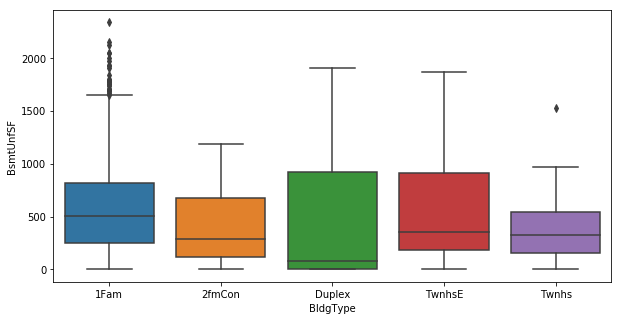

In [44]:
#box plot 
var = 'BldgType'
data = pd.concat([df['BsmtUnfSF'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y=df['BsmtUnfSF'], data=df)

In [45]:
print((df[df['BldgType']=='Duplex']['BsmtUnfSF']==0).count())

52


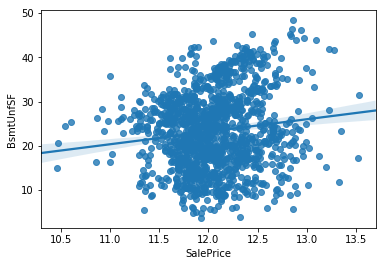

In [46]:
ax = sns.regplot(x=df[df.BsmtUnfSF>0]["SalePrice"], y=np.sqrt(df[df.BsmtUnfSF>0]['BsmtUnfSF']), data=df)

I will transform it sqrt

In [47]:
df['BsmtUnfSF']=np.sqrt(df['BsmtUnfSF'])

# *TotalBsmtSF* 
Total square feet of basement area

I will apply np.sqrt()

In [48]:
print ('missing Values')
print(df['TotalBsmtSF'].isna().sum())
print ('Values=0')
print(df[df['TotalBsmtSF']==0]['TotalBsmtSF'].count())

missing Values
0
Values=0
37


There is no missing value, but it has 37 values equal to 0.

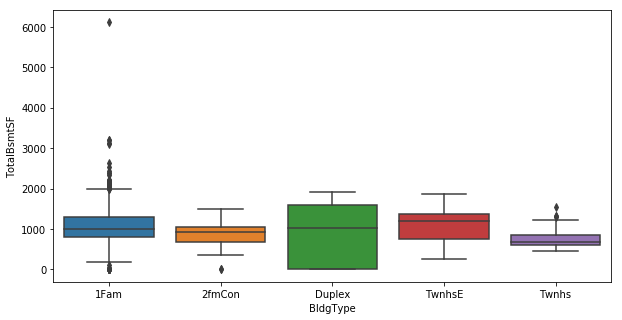

In [49]:
#box plot 
var = 'BldgType'
data = pd.concat([df['TotalBsmtSF'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y=df['TotalBsmtSF'], data=df)

Most of Duplex's doesnt have basement. 

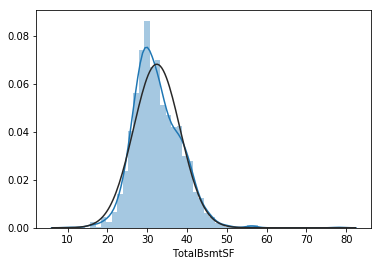

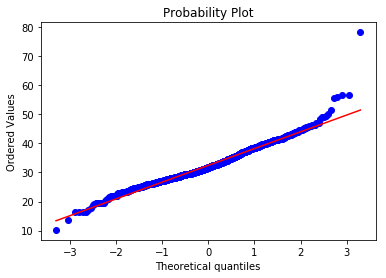

In [50]:
#histogram and normal probability plot
sns.distplot(np.sqrt(df[df['TotalBsmtSF']>0]['TotalBsmtSF']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.sqrt(df[df['TotalBsmtSF']>0]['TotalBsmtSF']), plot=plt)

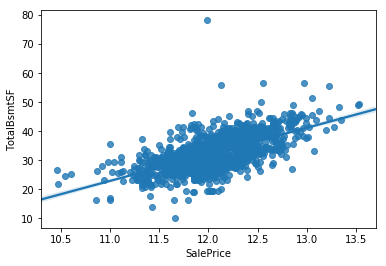

In [51]:
ax = sns.regplot(x=df[df.TotalBsmtSF>0]["SalePrice"], y=np.sqrt(df[df.TotalBsmtSF>0]['TotalBsmtSF']), data=df)

I will apply sqrt to transform it

In [52]:
df['TotalBsmtSF']=np.sqrt(df['TotalBsmtSF'])

# BsmtHalfBath: 
Basement half bathrooms

it was assigned as 1 and 0.

In [53]:
print ('missing Values')
print(df['BsmtHalfBath'].isna().sum())

missing Values
0


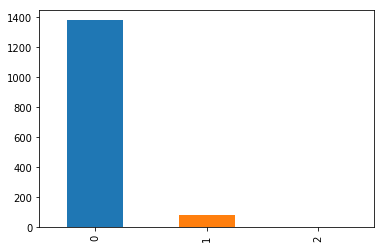

In [54]:
pd.Series(df['BsmtHalfBath']).value_counts().plot('bar')

# *MSZoning*
Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [55]:
print ('missing Values')
print(df['MSZoning'].isna().sum())

missing Values
0


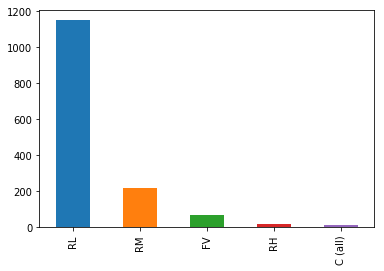

In [56]:
pd.Series(df['MSZoning']).value_counts().plot('bar')

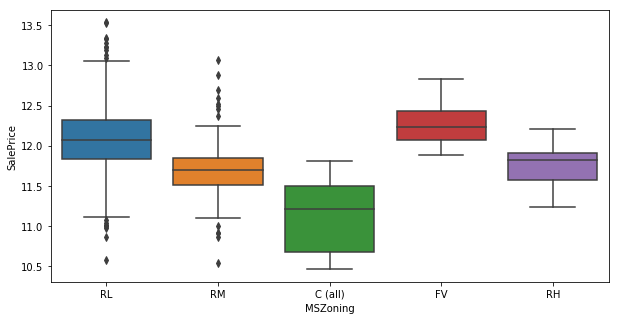

In [57]:
#box plot overallqual/saleprice
var = 'MSZoning'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)


In [58]:
cleanup_nums = {"MSZoning":     {"C (all)": 1, "RM": 2, "RH":3, "RL":4, "FV":5}}
df.replace(cleanup_nums, inplace=True)  

In [59]:
#df = df.copy()
#df = pd.get_dummies(df, columns=['MSZoning'], prefix = ['MSZoning'])
#df.head()

In [60]:
#df=df.drop(columns=['MSZoning_RH'])
#df=df.drop(columns=['MSZoning_C (all)'])

In [61]:
#df=df.drop(columns=['MSZoning'])

One-Hot encoding:The basic strategy is to convert each category value into a column and assign a 1, 2, 3, 4, and 5. This has the benefit of not weighting a value improperly.

# *Street*
Type of road access to property

       Grvl	Gravel	
       Pave	Paved

In [62]:
print ('missing Values')
print(df['Street'].isna().sum())

missing Values
0


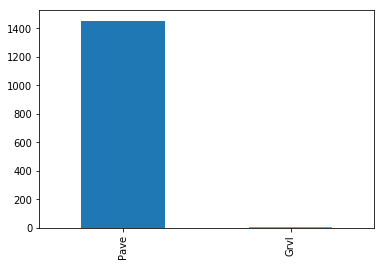

In [63]:
pd.Series(df['Street']).value_counts().plot('bar')

The categorical value represents the numerical value of the entry in the dataset. 
The categories are of type character, so I will use the following function to enumerate them

In [64]:
cleanup_nums = {"Street":     {"Pave": 1, "Grvl": 2}}
df.replace(cleanup_nums, inplace=True) 

# *Alley*
Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [65]:
print(df['Alley'].isna().sum())

1369


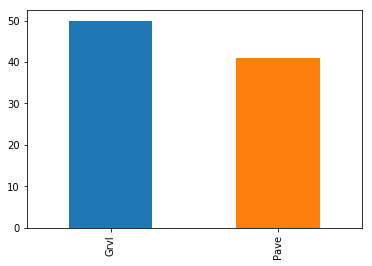

In [66]:
pd.Series(df['Alley']).value_counts().plot('bar')

Since he most of valuse are missing and it is not a decisive feature on sale price so I will drop "Alley"

In [67]:
df=df.drop(columns=['Alley'])

# *LotShape*
General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [68]:
print(df['LotShape'].isna().sum())

0


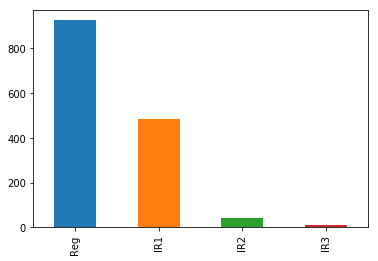

In [69]:
pd.Series(df['LotShape']).value_counts().plot('bar')

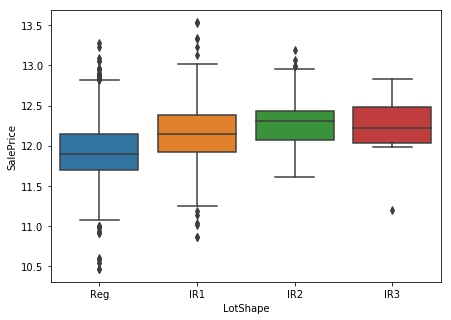

In [70]:
#box plot overallqual/saleprice
var = 'LotShape'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=dfTrain)

I will enumerate characters as following;

In [71]:
cleanup_nums = {"LotShape":     {"Reg": 1, "IR1": 2, "IR2": 3, "IR3": 4}}
df.replace(cleanup_nums, inplace=True) 

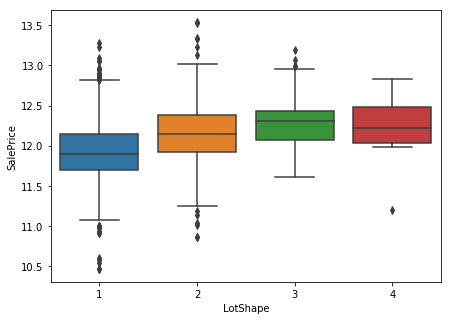

In [72]:
#box plot overallqual/saleprice
var = 'LotShape'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *LandContour*
Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

na Values
0


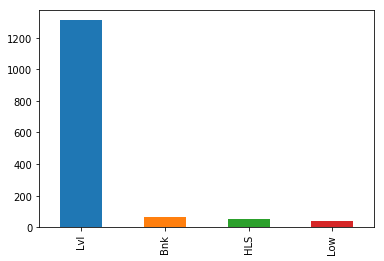

In [73]:
print("na Values")
print(df['LandContour'].isna().sum())
pd.Series(df['LandContour']).value_counts().plot('bar')

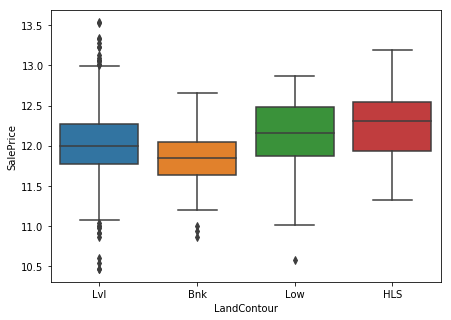

In [74]:
#box plot 
var = 'LandContour'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

I will enumerate characters as following;

In [75]:
cleanup_nums = {"LandContour":     {"Lvl": 1, "Bnk": 2, "HLS": 3, "Low": 4}}
df.replace(cleanup_nums, inplace=True) 

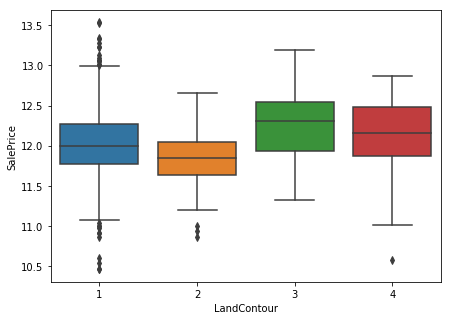

In [76]:
#box plot 
var = 'LandContour'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *Utilities*
Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

na Values
0


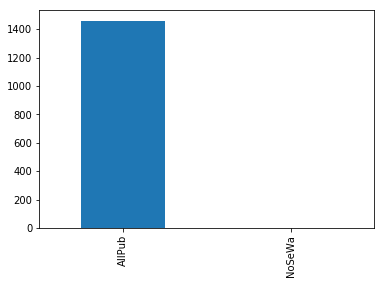

In [77]:
print("na Values")
print(df['Utilities'].isna().sum())
pd.Series(df['Utilities']).value_counts().plot('bar')

I will drop it becouse all of the homes have "AllPub".

In [78]:
df=df.drop(columns=['Utilities'])

# *LotConfig*
Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

na Values
0


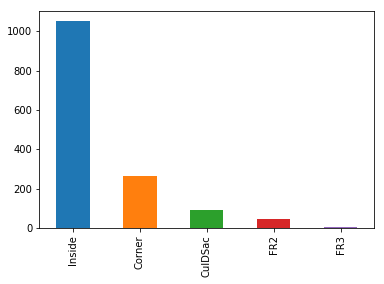

In [79]:
print("na Values")
print(df['LotConfig'].isna().sum())
pd.Series(df['LotConfig']).value_counts().plot('bar')

I will enumerate characters as following;

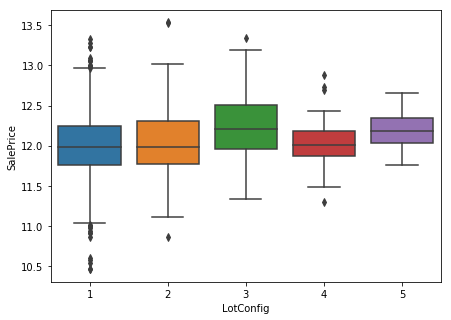

In [80]:
cleanup_nums = {"LotConfig":     {"Inside": 1, "Corner": 2, "CulDSac": 3, "FR2": 4, "FR3": 5}}
df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'LotConfig'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *LandSlope*
Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

na Values
0


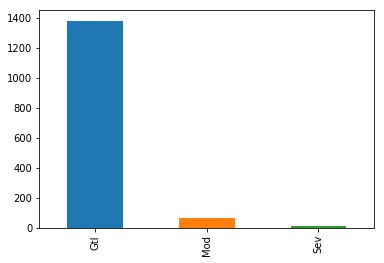

In [81]:
print("na Values")
print(df['LandSlope'].isna().sum())
pd.Series(df['LandSlope']).value_counts().plot('bar')

I will enumerate characters as following;

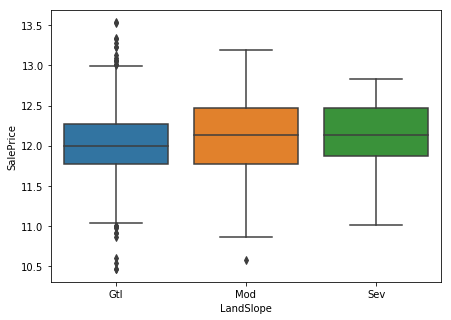

In [82]:
#cleanup_nums = {"LandSlope":     {"Gtl": 1, "Mod": 2, "Sev": 3}}
#df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'LandSlope'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

In [83]:
df = df.copy()
df = pd.get_dummies(df, columns=['LandSlope'], prefix = ['LandSlope'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition1,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FrstFlrSF,BsmtFinSF2_Flag,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,60,4,65.0,91.923882,1,1,1,1,CollgCr,Norm,...,2,2008,WD,Normal,12.247694,6.752270,0.0,1,0,0
1,20,4,80.0,97.979590,1,1,1,4,Veenker,Feedr,...,5,2007,WD,Normal,12.109011,7.140453,0.0,1,0,0
2,60,4,68.0,106.066017,1,2,1,1,CollgCr,Norm,...,9,2008,WD,Normal,12.317167,6.824374,0.0,1,0,0
3,70,4,60.0,97.724101,1,2,1,2,Crawfor,Norm,...,2,2006,WD,Abnorml,11.849398,6.867974,0.0,1,0,0
4,60,4,84.0,119.415242,1,2,1,4,NoRidge,Norm,...,12,2008,WD,Normal,12.429216,7.043160,0.0,1,0,0


# *Neighborhood*
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

na Values
0


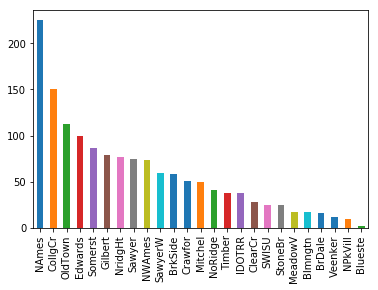

In [84]:
print("na Values")
print(df['Neighborhood'].isna().sum())
pd.Series(df['Neighborhood']).value_counts().plot('bar')

Since this is a categorical feature without order, I will create dummy features.

#cleanup_nums = {"Neighborhood":     {"Blmngtn":0, "Blueste":1, "BrDale":2, "BrkSide":3, "ClearCr":4, "CollgCr": 5, "Crawfor":6, "Edwards":7, "Gilbert":8, 
                                "IDOTRR":9, "MeadowV":10, "Mitchel":11, "Names":12, "NoRidge":13, "NPkVill":14,
                                                        "NridgHt":15, "NWAmes":16, "OldTown":17, "SWISU":18, "Sawyer":19,
                                                                            "SawyerW":20, "Somerst":21, "StoneBr":22,
                                                                                        "Timber":23, "Veenker":24, "Names":25}}
df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'Neighborhood'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(15,10))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

In [85]:
df = df.copy()
df = pd.get_dummies(df, columns=['Neighborhood'], prefix = ['Neighborhood'])

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Condition1,Condition2,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,4,65.0,91.923882,1,1,1,1,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
1,20,4,80.0,97.979590,1,1,1,4,Feedr,Norm,...,0,0,0,0,0,0,0,0,0,1
2,60,4,68.0,106.066017,1,2,1,1,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
3,70,4,60.0,97.724101,1,2,1,2,Norm,Norm,...,0,0,0,0,0,0,0,0,0,0
4,60,4,84.0,119.415242,1,2,1,4,Norm,Norm,...,1,0,0,0,0,0,0,0,0,0


# *Condition1*
Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	


na Values
0


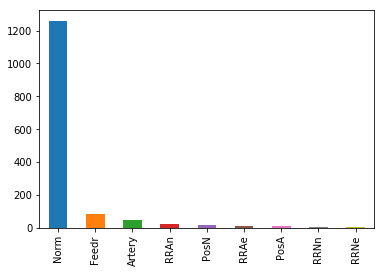

In [86]:
print("na Values")
print(df['Condition1'].isna().sum())
pd.Series(df['Condition1']).value_counts().plot('bar')

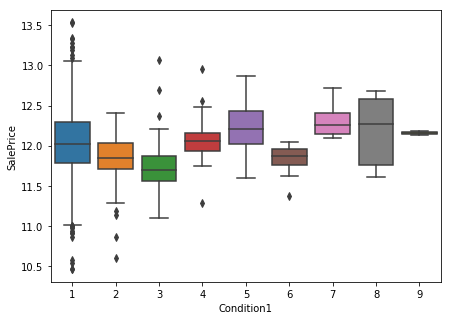

In [87]:
cleanup_nums = {"Condition1":     {"Norm": 1, "Feedr": 2, "Artery":3, "RRAn":4,"PosN":5, "RRAe":6, "PosA":7, "RRNn":8, "RRNe":9}}
df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'Condition1'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

df = df.copy()
df = pd.get_dummies(df, columns=['Condition1'], prefix = ['Condition1'])

df.head()

# *Condition2*
Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

na Values
0


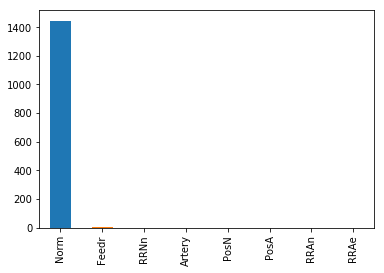

In [88]:
print("na Values")
print(df['Condition2'].isna().sum())
pd.Series(df['Condition2']).value_counts().plot('bar')

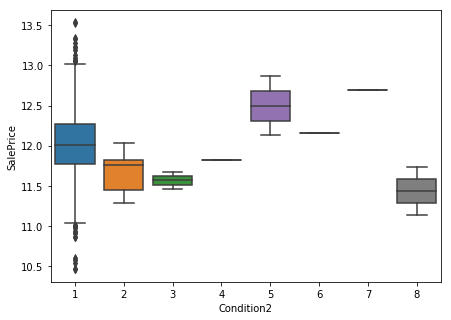

In [89]:
cleanup_nums = {"Condition2":     {"Norm": 1, "Feedr": 2, "Artery":3, "RRAn":4,"PosN":5, "RRAe":6, "PosA":7, "RRNn":8, "RRNe":9}}
df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'Condition2'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *BldgType*
Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

na Values
0


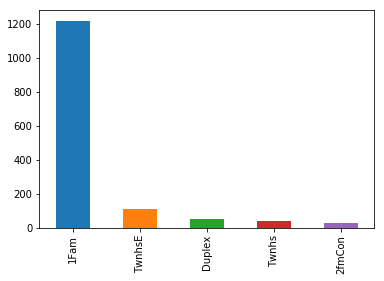

In [90]:
print("na Values")
print(df['BldgType'].isna().sum())
pd.Series(df['BldgType']).value_counts().plot('bar')

I will enumerate characters as following; 

In [91]:
#Lets asign 1Fam=1, 2FmCon=2, Duplx=3, TwnhsE=4, TwnhsI=5       
# For each row in the column,
BldgType=[]
for row in df['BldgType']:
        if row =='1Fam':
            BldgType.append(1)
        elif row =='2fmCon':
            BldgType.append(2)
        elif row =='Duplex':
            BldgType.append(3)
        elif row =='TwnhsE':
            BldgType.append(4)
        elif row =='Twnhs':
            BldgType.append(5)
#change asign numbers to column values
df['BldgType']=pd.DataFrame(BldgType)
df['BldgType'].head()

0    1
1    1
2    1
3    1
4    1
Name: BldgType, dtype: int64

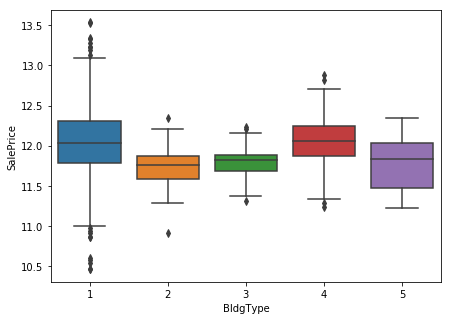

In [92]:
var = 'BldgType'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *HouseStyle*
Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

na Values
0


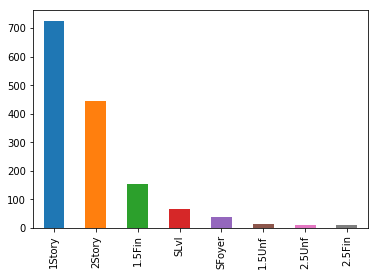

In [93]:
print("na Values")
print(df['HouseStyle'].isna().sum())
pd.Series(df['HouseStyle']).value_counts().plot('bar')

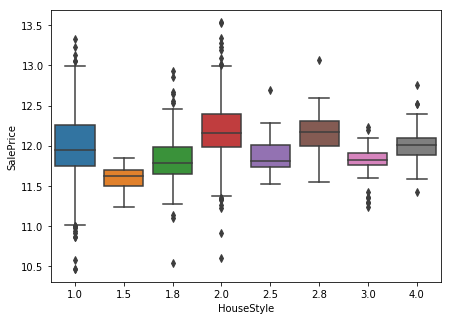

In [94]:
cleanup_nums = {"HouseStyle":     {"1Story": 1, "1.5Unf": 1.5, "1.5Fin":1.8, "2Story":2,"2.5Unf":2.5, "2.5Fin":2.8, "SFoyer":3, "SLvl":4}}
df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'HouseStyle'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *OverallQual*
Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	


na Values
0


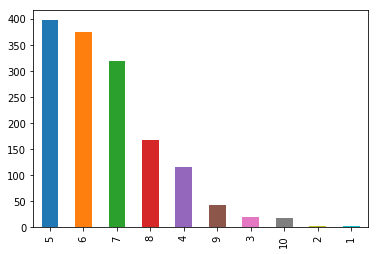

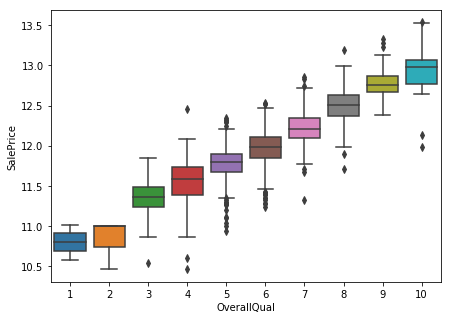

In [95]:
print("na Values")
print(df['OverallQual'].isna().sum())
pd.Series(df['OverallQual']).value_counts().plot('bar')
#box plot 
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *OverallCond*
Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		

na Values
0


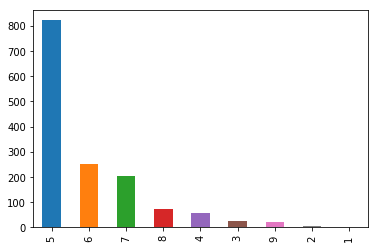

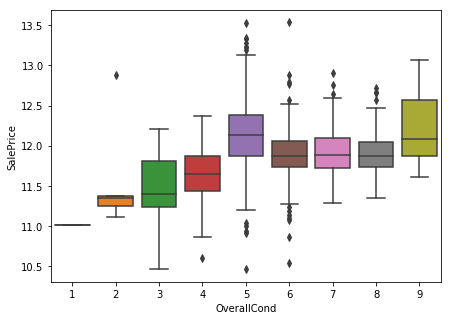

In [96]:
print("na Values")
print(df['OverallCond'].isna().sum())
pd.Series(df['OverallCond']).value_counts().plot('bar')
#box plot 
var = 'OverallCond'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *YearRemodAdd* 
Remodel date (same as construction date if no remodeling or additions)

In [97]:
(df['YearRemodAdd']-df['YearBuilt']).head()

0     0
1     0
2     1
3    55
4     0
dtype: int64

If the remodeling and building date are same I will assign 0, otherwise, I will assign 1.

In [98]:
# Create a list to store the data
YY=df['YearRemodAdd']-df['YearBuilt']
# For each row in the column,
RemodAdd=[]
for row in YY:
        if row == 0:
            RemodAdd.append(0)
        elif row>0:
            RemodAdd.append(1)
df['RemodAdd']=pd.DataFrame(RemodAdd)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Condition1,Condition2,...,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RemodAdd
0,60,4,65.0,91.923882,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20,4,80.0,97.979590,1,1,1,4,2,1,...,0,0,0,0,0,0,0,0,1,0
2,60,4,68.0,106.066017,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,70,4,60.0,97.724101,1,2,1,2,1,1,...,0,0,0,0,0,0,0,0,0,1
4,60,4,84.0,119.415242,1,2,1,4,1,1,...,0,0,0,0,0,0,0,0,0,0


# *YearBuilt*
Here we can see a fairly consistent upward trend for the SalePrice as houses are more modern.

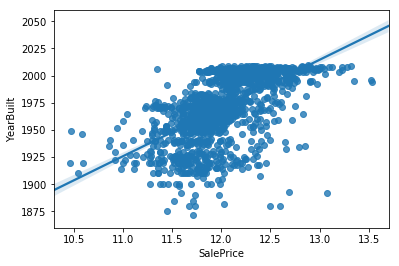

In [99]:
ax = sns.regplot(x="SalePrice", y="YearBuilt", data=df)

there is linear a correlation between 'YearBuilt' and 'Sale Price'.

For this feature, I am going to create bins and dummy features

In [100]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [101]:
bins = [1872, 1954, 1973, 1990, 2000, 2010]
df['binned'] = pd.cut(df['YearBuilt'], bins)
df = df.copy()
df = pd.get_dummies(df, columns=['binned'], prefix = ['binned'])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Condition1,Condition2,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RemodAdd,"binned_(1872, 1954]","binned_(1954, 1973]","binned_(1973, 1990]","binned_(1990, 2000]","binned_(2000, 2010]"
0,60,4,65.0,91.923882,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,20,4,80.0,97.979590,1,1,1,4,2,1,...,0,0,0,1,0,0,0,1,0,0
2,60,4,68.0,106.066017,1,2,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
3,70,4,60.0,97.724101,1,2,1,2,1,1,...,0,0,0,0,1,1,0,0,0,0
4,60,4,84.0,119.415242,1,2,1,4,1,1,...,0,0,0,0,0,0,0,0,1,0


In [102]:
df=df.rename(columns={"binned_(1872, 1954]":"BuiltYear1", "binned_(1954, 1973]":"BuiltYear2", 
                       "binned_(1973, 1990]":"BuiltYear3","binned_(1990, 2000]":"BuiltYear4",
                       "binned_(2000, 2010]":"BuiltYear5"})
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Condition1,Condition2,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RemodAdd,BuiltYear1,BuiltYear2,BuiltYear3,BuiltYear4,BuiltYear5
0,60,4,65.0,91.923882,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,20,4,80.0,97.979590,1,1,1,4,2,1,...,0,0,0,1,0,0,0,1,0,0
2,60,4,68.0,106.066017,1,2,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
3,70,4,60.0,97.724101,1,2,1,2,1,1,...,0,0,0,0,1,1,0,0,0,0
4,60,4,84.0,119.415242,1,2,1,4,1,1,...,0,0,0,0,0,0,0,0,1,0


# *RoofStyle*
Type of roof

       Flat
       Gable
       Gambrel(Barn)
       Hip	
       Mansard
       Shed	

na Values
0


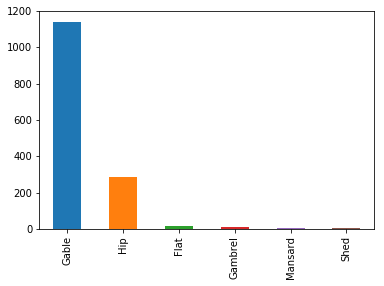

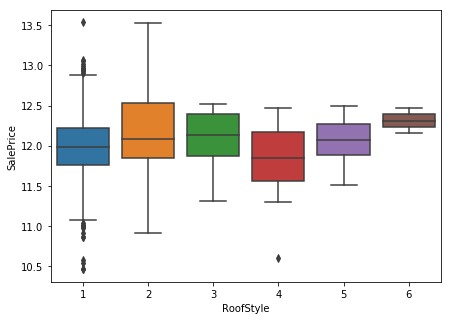

In [103]:
print("na Values")
print(df['RoofStyle'].isna().sum())
pd.Series(df['RoofStyle']).value_counts().plot('bar')
#I will assign numbers for each type of roof
cleanup_nums = {"RoofStyle":     {"Gable": 1, "Hip": 2, "Flat":3, "Gambrel":4,"Mansard":5, "Shed":6 }}
df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'RoofStyle'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *RoofMatl*
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

na Values
0


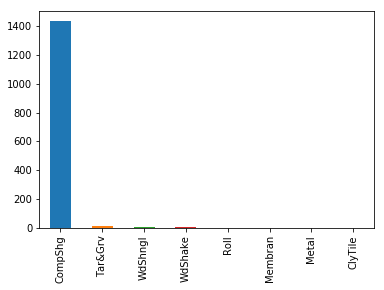

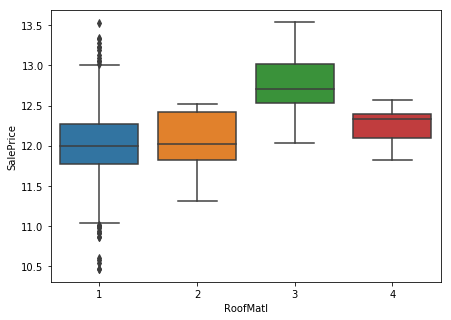

In [104]:
print("na Values")
print(df['RoofMatl'].isna().sum())
pd.Series(df['RoofMatl']).value_counts().plot('bar')
#I will assign numbers for each type of roof matarial
cleanup_nums = {"RoofMatl":     {"CompShg": 1, "Tar&Grv": 2, "WdShngl":3, "WdShake":4,"ClyTile":4, "Roll":4, "Membran":4, "Metal":4 }}
df.replace(cleanup_nums, inplace=True)
#box plot 
var = 'RoofMatl'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *Exterior1st*
Exterior covering on house 

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
      

*They very close eachother

*I will put flag on the they ar smilar so I will drop 'Exterior2nd'

In [105]:
df=df.drop(columns=['Exterior2nd'])

na Values for Exterior1st
0


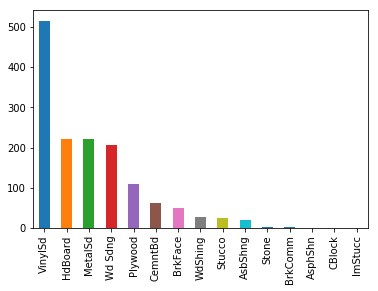

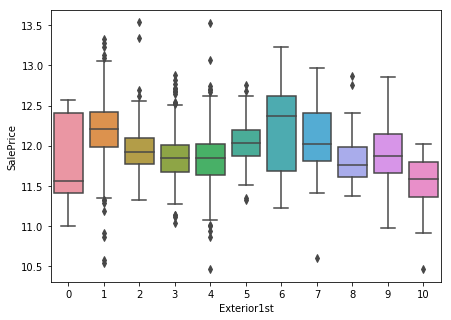

In [106]:
print("na Values for Exterior1st")
print(df['Exterior1st'].isna().sum())

pd.Series(df['Exterior1st']).value_counts().plot('bar')

#I will assign numbers for each type of 
cleanup_nums = {"Exterior1st":     {"VinylSd": 1, "HdBoard": 2, "MetalSd":3, "Wd Sdng":4,"Plywood":5, "CemntBd":6, "BrkFace":7, "WdShing":8, "Stucco":9, "AsbShng":10,"Stone":0,"BrkComm":0, "ImStucc":0, "AsphShn":0, "CBlock":0}}
df.replace(cleanup_nums, inplace=True)

#box plot 'Exterior1st'
var = 'Exterior1st'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *ExterQual*
Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

na Values
0


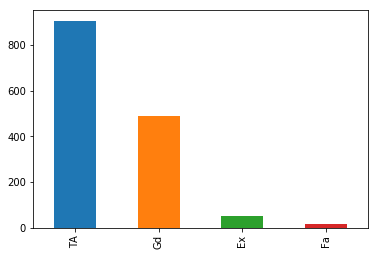

In [107]:
print("na Values")
print(df['ExterQual'].isna().sum())

pd.Series(df['ExterQual']).value_counts().plot('bar')

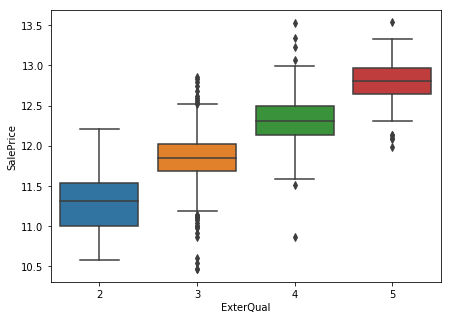

In [108]:
#I will assign numbers 
cleanup_nums = {"ExterQual":     {"Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)

#box plot 'Exterior1st'
var = 'ExterQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

There is high liner coralation between "ExterQual" and "SalePrice"

# *ExterCond*
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

na Values
0


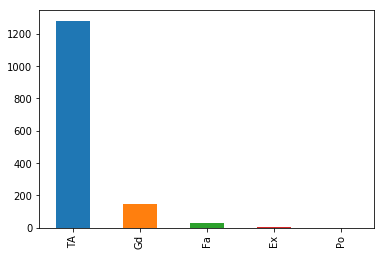

In [109]:
print("na Values")
print(df['ExterCond'].isna().sum())

pd.Series(df['ExterCond']).value_counts().plot('bar')

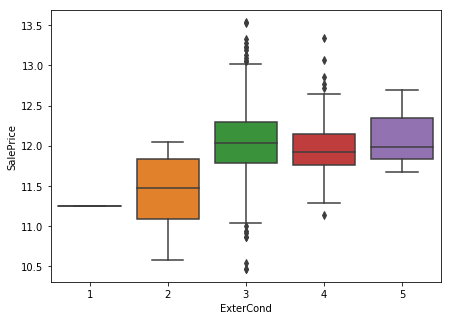

In [110]:
#I will assign numbers 
cleanup_nums = {"ExterCond":     {"Po":1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)

#box plot 'Exterior1st'
var = 'ExterCond'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *Foundation*
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

na Values
0


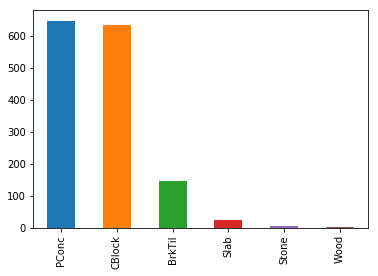

In [111]:
print("na Values")
print(df['Foundation'].isna().sum())

pd.Series(df['Foundation']).value_counts().plot('bar')

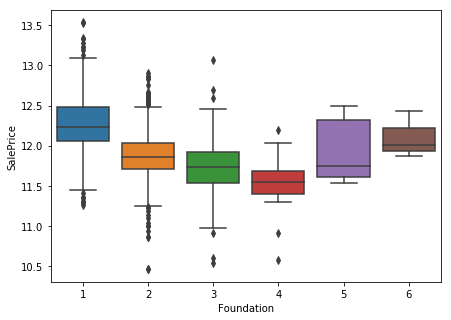

In [112]:
#I will assign numbers
cleanup_nums = {"Foundation":     {"BrkTil":3, "CBlock":2, "PConc":1, "Slab":4, "Stone":5, "Wood":6}}
df.replace(cleanup_nums, inplace=True)

#box plot 'Exterior1st'
var = 'Foundation'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *BsmtQual*
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [113]:
print("na Values")
print(df['BsmtQual'].isna().sum())

na Values
37


The 37 values of variable are na so I will fill na as 0

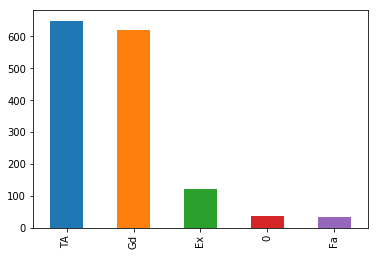

In [114]:
# I will fill na as 0
df['BsmtQual']=df['BsmtQual'].fillna(0)
pd.Series(df['BsmtQual']).value_counts().plot('bar')

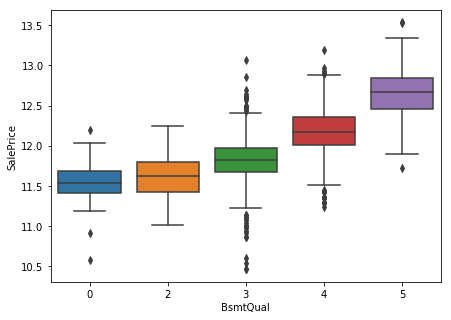

In [115]:
#I will assign numbers
cleanup_nums = {"BsmtQual":     {"Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)

#box plot 'Exterior1st'
var = 'BsmtQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *BsmtCond*
Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [116]:
print("na Values")
print(df['BsmtCond'].isna().sum())

na Values
37


The 37 values of variable are na so I will fill na as 0

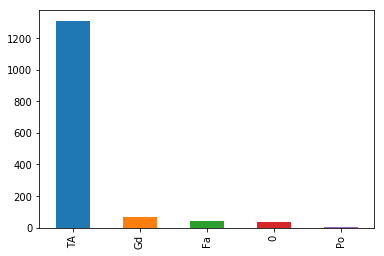

In [117]:
# I will fill na as 0
df['BsmtCond']=df['BsmtCond'].fillna(0)
pd.Series(df['BsmtCond']).value_counts().plot('bar')

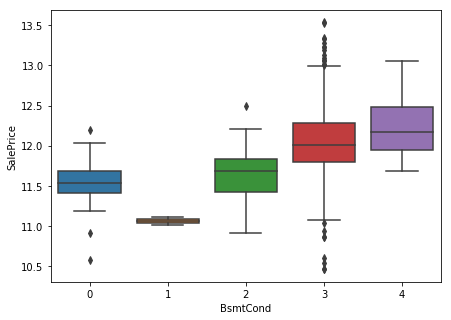

In [118]:
#I will assign numbers
cleanup_nums = {"BsmtCond":     {"Po": 1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)

#box plot 'Exterior1st'
var = 'BsmtCond'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *BsmtExposure*
Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [119]:
print("na Values")
print(df['BsmtExposure'].isna().sum())

na Values
38


The 38 values of variable are na so I will fill na as 0

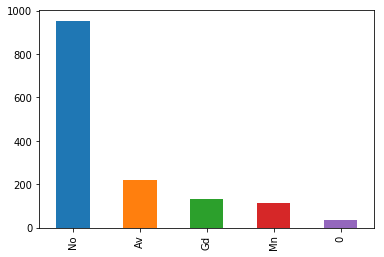

In [120]:
# I will fill na as 0
df['BsmtExposure']=df['BsmtExposure'].fillna(0)
pd.Series(df['BsmtExposure']).value_counts().plot('bar')

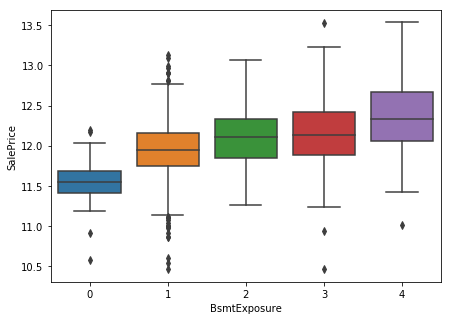

In [121]:
#I will assign numbers
cleanup_nums = {"BsmtExposure":     {"No": 1, "Mn": 2, "Av": 3, "Gd":4}}
df.replace(cleanup_nums, inplace=True)

#box plot 'Exterior1st'
var = 'BsmtExposure'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *BsmtFinType2*
Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Since 'Bsmt Fin Type 1' and 'Bsmt FreeType2' are highly correlated I will assign as 1 and 0

In [122]:
df[['BsmtFinType2']].isna().sum()

BsmtFinType2    38
dtype: int64

In [123]:
# For each row in the column,
BsmtFTM_Flag=[]
x=df['BsmtFinType1']
y=df['BsmtFinType2']
ZZ=x == y
YY=pd.DataFrame(ZZ)
for row in YY[0]:
    if row==True:
        BsmtFTM_Flag.append(1)
    else:
            BsmtFTM_Flag.append(0)
df['BsmtFTM_Flag']=pd.DataFrame(BsmtFTM_Flag)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Condition1,Condition2,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RemodAdd,BuiltYear1,BuiltYear2,BuiltYear3,BuiltYear4,BuiltYear5,BsmtFTM_Flag
0,60,4,65.0,91.923882,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,20,4,80.0,97.979590,1,1,1,4,2,1,...,0,0,1,0,0,0,1,0,0,0
2,60,4,68.0,106.066017,1,2,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
3,70,4,60.0,97.724101,1,2,1,2,1,1,...,0,0,0,1,1,0,0,0,0,0
4,60,4,84.0,119.415242,1,2,1,4,1,1,...,0,0,0,0,0,0,0,1,0,0


In [124]:
df=df.drop(columns=['BsmtFinType2'])

# *BsmtFinType1*
Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [125]:
print("na Values")
print(df['BsmtFinType1'].isna().sum())

na Values
37


Since NA is No BasementThe, I will fill na as 0

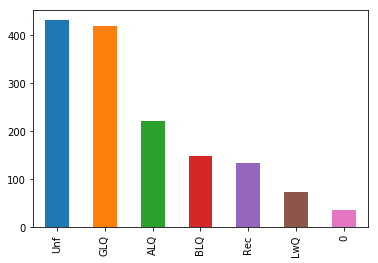

In [126]:
# I will fill na as 0
df['BsmtFinType1']=df['BsmtFinType1'].fillna(0)
pd.Series(df['BsmtFinType1']).value_counts().plot('bar')

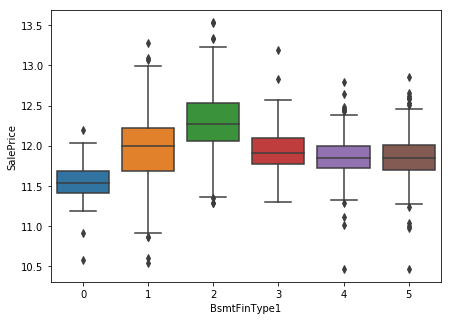

In [127]:
#I will assign numbers
cleanup_nums = {"BsmtFinType1":     {"Unf": 1, "GLQ": 2, "ALQ": 3, "BLQ":4, "Rec": 5, "LwQ":5}}
df.replace(cleanup_nums, inplace=True)
#box plot 'BsmtFinType1'
var = 'BsmtFinType1'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *Heating* 
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

na Values
0


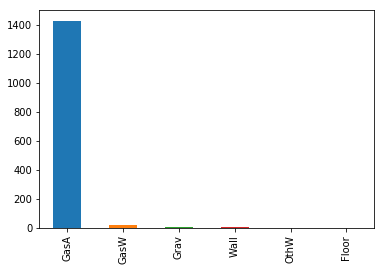

In [128]:
print("na Values")
print(df['Heating'].isna().sum())
pd.Series(df['Heating']).value_counts().plot('bar')

It can be seen frm figure most of properties have GasA and coralataion between SalePrice and Gas is depends on having heating system or not so I will create dummy with 1 and 0

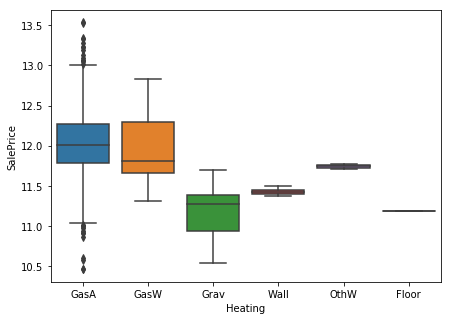

In [129]:
#box plot overallqual/saleprice
var = 'Heating'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

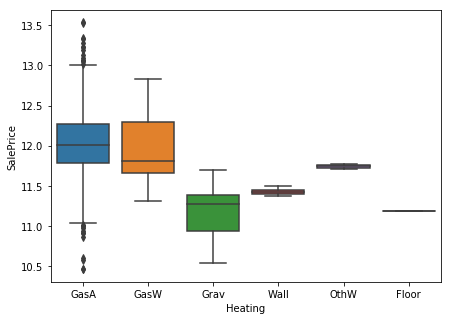

In [130]:
#I will assign numbers
#cleanup_nums = {"Heating":     {"GasA":6, 'Floor':2, 'GasW':5,'Grav':1,  'OthW':4, 'Wall':3}}
#df.replace(cleanup_nums, inplace=True)
#box plot 'BsmtFinType1'
var = 'Heating'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

In [131]:
df = df.copy()
df = pd.get_dummies(df, columns=['Heating'], prefix = ['Heating'])
df.head()
df=df.drop(columns=['Heating_Floor', 'Heating_GasW','Heating_Grav',  'Heating_OthW', 'Heating_Wall'])
df=df.rename(columns = {'Heating_GasA':'GasA_Flag'})

In [132]:
df=df.rename(columns = {'Heating_GasA':'GasA_Flag'})

# *HeatingQC* 
Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

na Values
0


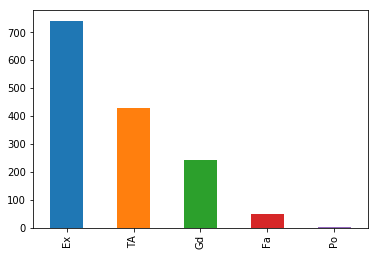

In [133]:
print("na Values")
print(df['HeatingQC'].isna().sum())
pd.Series(df['HeatingQC']).value_counts().plot('bar')

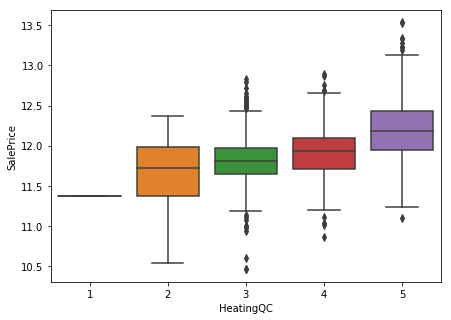

In [134]:
#I will assign numbers
cleanup_nums = {"HeatingQC":     {"Po": 1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)
#box plot 'BsmtFinType1'
var = 'HeatingQC'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *CentralAir*
Central air conditioning

       N	No
       Y	Yes

na Values
0


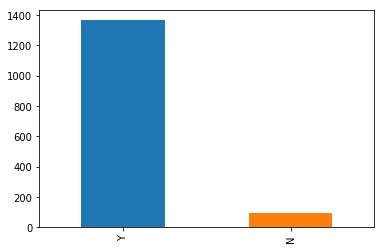

In [135]:
print("na Values")
print(df['CentralAir'].isna().sum())
pd.Series(df['CentralAir']).value_counts().plot('bar')

In [136]:
# For each row in the column,
CentralAir=[]
for row in df['CentralAir']:
        if row == 'Y':
            CentralAir.append(1)
        elif row=='N':
            CentralAir.append(0)
df['CentralAir']=pd.DataFrame(CentralAir)
df['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

# *Electrical*
Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [137]:
print("na Values")
print(df['Electrical'].isna().sum())

na Values
1


In [138]:
df['Electrical']=df['Electrical'].fillna(0)

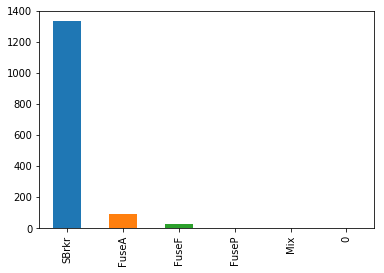

In [139]:
pd.Series(df['Electrical']).value_counts().plot('bar')

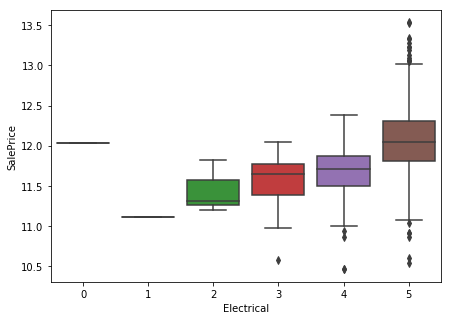

In [140]:
cleanup_nums = {"Electrical":     {"SBrkr": 5, "FuseA": 4, "FuseF": 3, "FuseP":2, "Mix":1}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'Electrical'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *KitchenQual*
Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

na Values
0


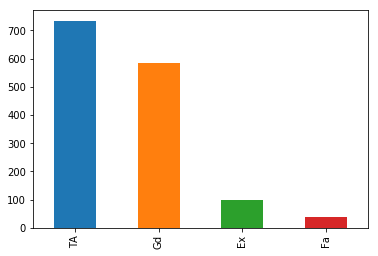

In [141]:
print("na Values")
print(df['KitchenQual'].isna().sum())
pd.Series(df['KitchenQual']).value_counts().plot('bar')

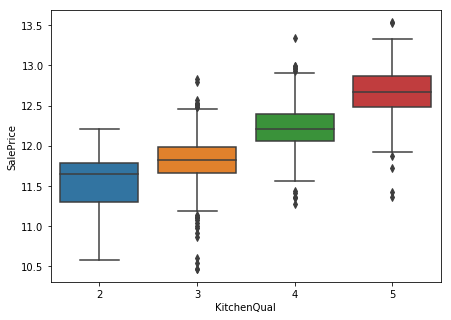

In [142]:
cleanup_nums = {"KitchenQual":     {"Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'KitchenQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[2,3,4,5])

# *Functional*
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

na Values
0


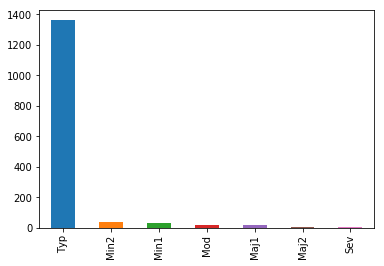

In [143]:
print("na Values")
print(df['Functional'].isna().sum())
pd.Series(df['Functional']).value_counts().plot('bar')

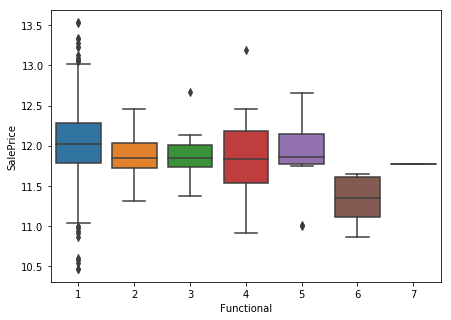

In [144]:
cleanup_nums = {"Functional":     {"Typ": 1, "Min1": 2, "Min2": 3, "Mod":4, "Maj1":5, "Maj2":6, "Sev":7}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'Functional'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[1,2,3,4,5,6,7])

# *FireplaceQu*
Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [145]:
print("na Values")
print(df['FireplaceQu'].isna().sum())

na Values
690


690 values are na for "FireplaceQu" so I will check the 'Fireplaces'

na Values
0


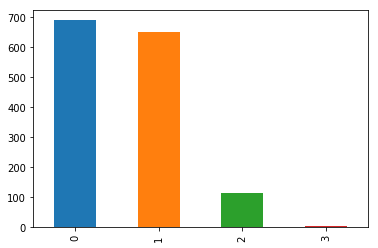

In [146]:
print("na Values")
print(df['Fireplaces'].isna().sum())
pd.Series(df['Fireplaces']).value_counts().plot('bar')

In [147]:
df[['Fireplaces', 'FireplaceQu']].head()

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA


It can be seen no fire place is same as na fire place quality so I will asign the na as 0

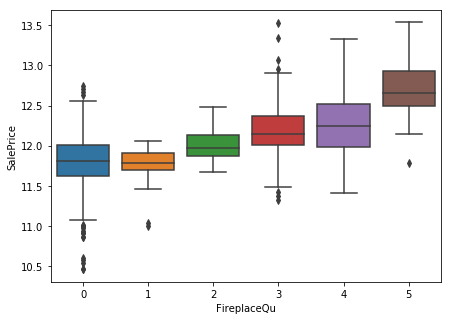

In [148]:
df['FireplaceQu']=df['FireplaceQu'].fillna(0)

cleanup_nums = {"FireplaceQu":     {"Po":1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'FireplaceQu'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 1,2,3,4,5])

# *GarageArea*
Size of garage in square feet

In [149]:
df[df['GarageArea']==0]['GarageArea'].count()

81

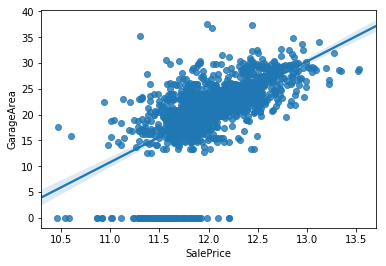

In [150]:
ax = sns.regplot(x="SalePrice", y=np.sqrt(df["GarageArea"]), data=df)

In [151]:
df['GarageArea']=np.sqrt(df['GarageArea'])

# *GarageType* and *GarageFinish*
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
GarageFinish : Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [152]:
df[["GarageFinish","GarageType" ]].isna().sum()

GarageFinish    81
GarageType      81
dtype: int64

In [153]:
df[df.GarageType.isnull()][['GarageType', "GarageFinish"]].head()

,GarageType,GarageFinish
39,NaN,NaN
48,NaN,NaN
78,NaN,NaN
88,NaN,NaN
89,NaN,NaN


Since NA mean is No Garage I will asign it with 0.

In [154]:
df['GarageFinish']=df['GarageFinish'].fillna(0)
df['GarageType']=df['GarageType'].fillna(0)

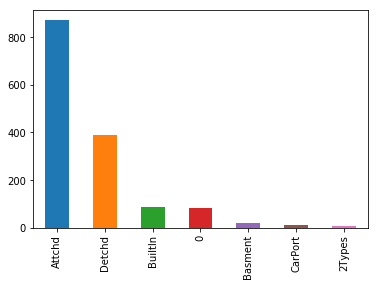

In [155]:
pd.Series(df['GarageType']).value_counts().plot('bar')

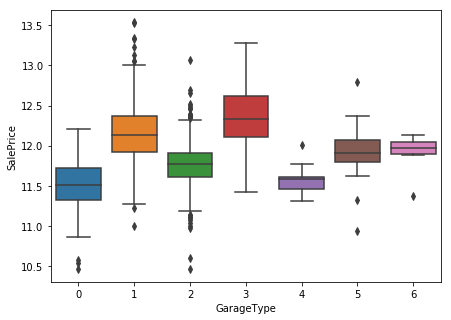

In [156]:
cleanup_nums = {"GarageType":     {"Attchd":1, "Detchd": 2, "BuiltIn": 3, "CarPort":4, "Basment":5, "2Types":6}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'GarageType'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 1,2,3,4,5,6])

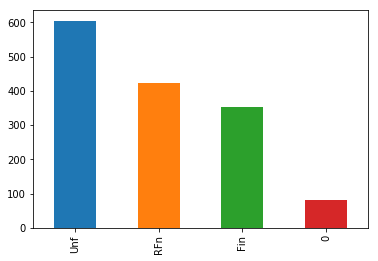

In [157]:
pd.Series(df['GarageFinish']).value_counts().plot('bar')

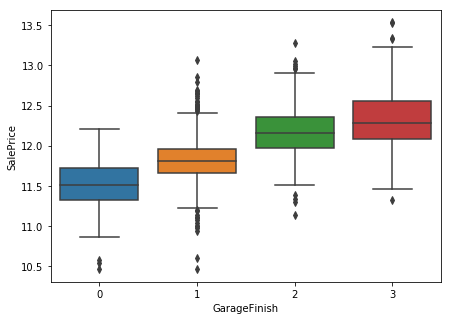

In [158]:
cleanup_nums = {"GarageFinish":     {"Unf":1, "RFn": 2, "Fin": 3}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'GarageFinish'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 1,2,3])

# *GarageQual* and *GarageCond*


       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


In [159]:
df[["GarageQual", "GarageCond" ]].isna().sum()

GarageQual    81
GarageCond    81
dtype: int64

Since NA mean is No Garage I will asign it with 0.

In [160]:
df['GarageQual']=df['GarageQual'].fillna(0)
df['GarageCond']=df['GarageCond'].fillna(0)

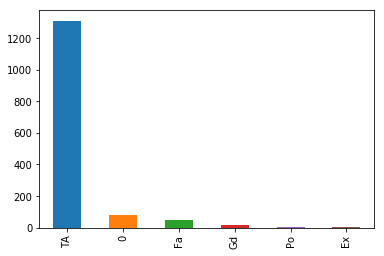

In [161]:
pd.Series(df['GarageQual']).value_counts().plot('bar')

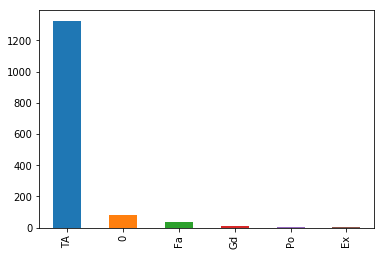

In [162]:
pd.Series(df['GarageCond']).value_counts().plot('bar')

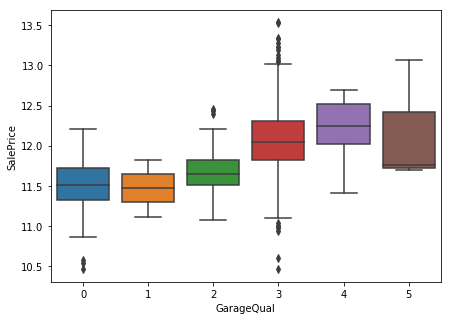

In [163]:
cleanup_nums = {"GarageQual":     {"Po":1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'GarageQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 1,2,3, 4, 5])

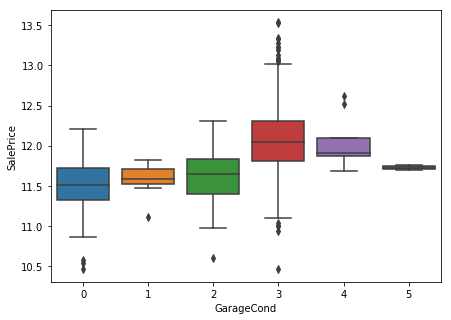

In [164]:
cleanup_nums = {"GarageCond":     {"Po":1, "Fa": 2, "TA": 3, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'GarageCond'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 1,2,3, 4, 5])

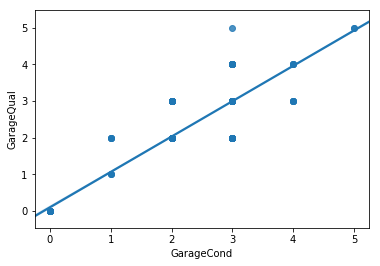

In [165]:
ax = sns.regplot(x="GarageCond", y="GarageQual", data=df)

In [166]:
df=df.drop(columns=['GarageQual'])

# *GarageYrBlt*
Year garage was built

In [167]:
df[["GarageYrBlt" ]].isna().sum()

GarageYrBlt    81
dtype: int64

In [168]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)

In [169]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasGrg'] = pd.Series(len(df['GarageYrBlt']), index=df.index)
df['HasGrg'] = 0 
df.loc[df['GarageYrBlt']>0,'HasGrg'] = 1
df=df.drop(columns=['GarageYrBlt']) #ekledim

# *PavedDrive*
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

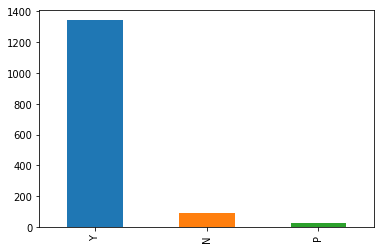

In [170]:
df[["PavedDrive" ]].isna().sum()
pd.Series(df["PavedDrive"]).value_counts().plot('bar')

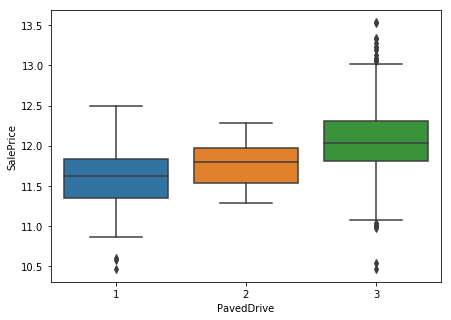

In [171]:
cleanup_nums = {"PavedDrive":     {"Y":3, "N": 1, "P": 2}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'PavedDrive'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[1,2,3])

# *PoolQC* 
Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [172]:
print("NA Pools")
print(df[["PoolQC" ]].isna().sum())
print("0 area Pools")
print(df[df.PoolArea==0]["PoolArea"].count())
df[["PoolQC", "PoolArea" ]].head()

NA Pools
PoolQC    1453
dtype: int64
0 area Pools
1453


,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0


I will asign NA as 0

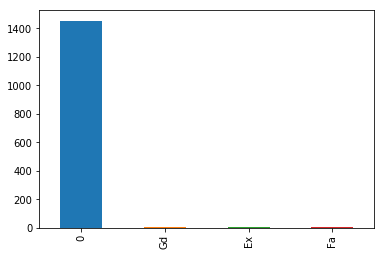

In [173]:
df['PoolQC']=df['PoolQC'].fillna(0)
pd.Series(df["PoolQC"]).value_counts().plot('bar')

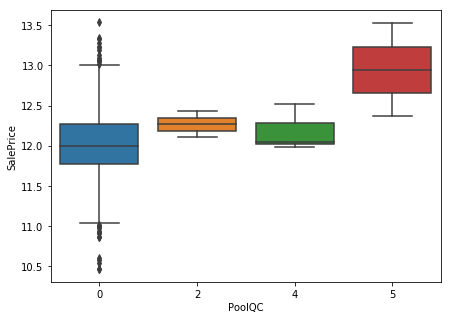

In [174]:
cleanup_nums = {"PoolQC":     {"Fa": 2, "Gd":4, "Ex":5}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'PoolQC'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 2, 4, 5])

In [175]:
df=df.drop(columns=['PoolQC'])

# *PoolArea* 
Pool area in square feet

In [176]:
print("NA Pools")
print(df[["PoolArea" ]].isna().sum())
print("0 area Pools")
print(df[df.PoolArea==0]["PoolArea"].count())

NA Pools
PoolArea    0
dtype: int64
0 area Pools
1453


In [177]:
df[df.PoolArea==0]["PoolArea"].count()

1453

In [178]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasPool'] = pd.Series(len(df['PoolArea']), index=df.index)
df['HasPool'] = 0 
df.loc[df['PoolArea']>0,'HasPool'] = 1
#df=df.drop(columns=['PoolArea']) #ekledim

In [179]:
df=df.drop(columns=['PoolArea'])

# *Fence*
Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [180]:
print("NA")
print(df[["Fence"]].isna().sum())

NA
Fence    1179
dtype: int64


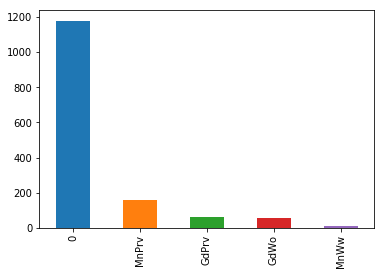

In [181]:
#I will asign NA as 0
df['Fence']=df['Fence'].fillna(0)
pd.Series(df["Fence"]).value_counts().plot('bar')

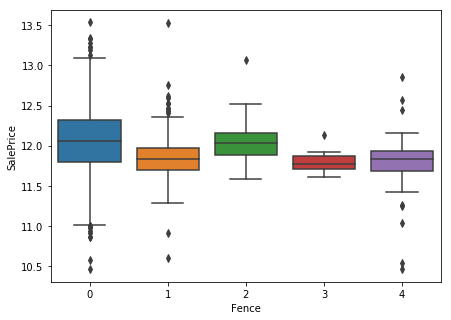

In [182]:
cleanup_nums = {"Fence":     {"MnPrv": 1,"GdPrv":2, "GdWo":4,"MnWw":3}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'Fence'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 1, 2, 3, 4])

# *MiscFeature*
Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

In [183]:
print("NA")
print(df[["MiscFeature"]].isna().sum())

NA
MiscFeature    1406
dtype: int64


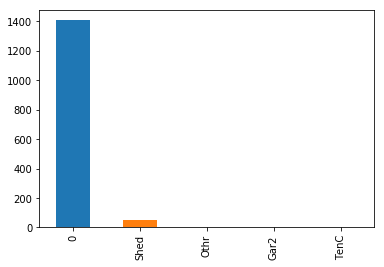

In [184]:
#I will asign NA as 0
df['MiscFeature']=df['MiscFeature'].fillna(0)
pd.Series(df["MiscFeature"]).value_counts().plot('bar')

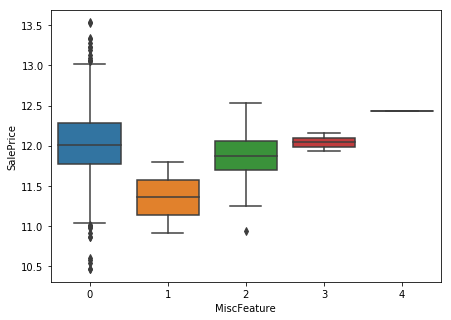

In [185]:
cleanup_nums = {"MiscFeature":     {"Shed": 2,"Gar2":3, "Othr":1,"TenC":4}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'MiscFeature'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df, order=[0, 1, 2, 3, 4])

# *SaleType*
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

NA
SaleType    0
dtype: int64


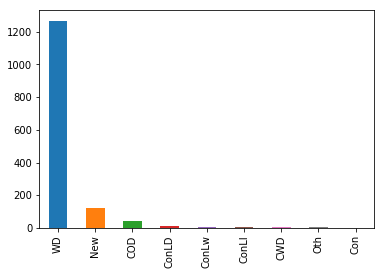

In [186]:
print("NA")
print(df[["SaleType"]].isna().sum())

pd.Series(df["SaleType"]).value_counts().plot('bar')

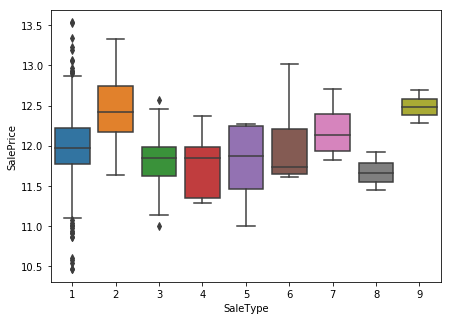

In [187]:
cleanup_nums = {"SaleType":     {"WD": 1,"New":2, "COD":3,"ConLD":4,"ConLw":5, "ConLI":6, "CWD":7, "Oth":8, "Con":9}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'SaleType'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *SaleCondition*
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


NA
SaleCondition    0
dtype: int64


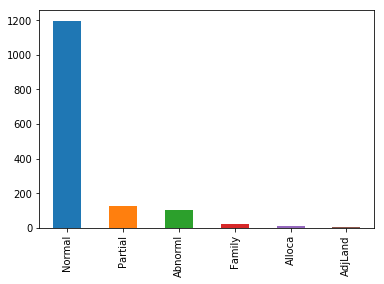

In [188]:
print("NA")
print(df[["SaleCondition"]].isna().sum())

pd.Series(df["SaleCondition"]).value_counts().plot('bar')

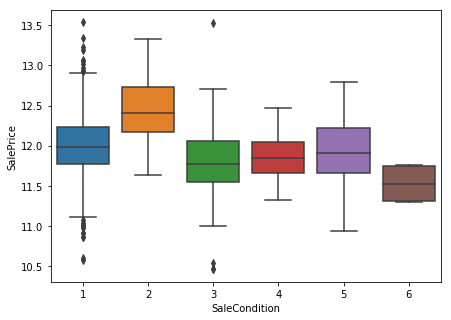

In [189]:
cleanup_nums = {"SaleCondition":     {"Normal": 1,"Partial":2, "Abnorml":3,"Family":4,"Alloca":5, "AdjLand":6}}
df.replace(cleanup_nums, inplace=True)
#box plot overallqual/saleprice
var = 'SaleCondition'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(7,5))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

# *OpenPorchSF*
Open porch area in square feet

I will apply np.sqrt()

In [190]:
df['OpenPorchSF']=np.sqrt(df['OpenPorchSF'])

In [191]:
df[df.OpenPorchSF==0]['OpenPorchSF'].count()

656

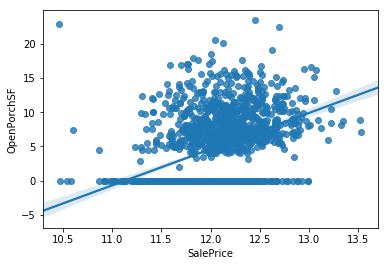

In [192]:
ax = sns.regplot(x="SalePrice", y="OpenPorchSF", data=df)

# *EnclosedPorch*
Enclosed porch area in square feet

In [193]:
df['EnclosedPorch']=np.sqrt(df['EnclosedPorch'])

In [194]:
print("NA")
print(df[["EnclosedPorch"]].isna().sum())

NA
EnclosedPorch    0
dtype: int64


In [195]:
df[df.EnclosedPorch==0]['EnclosedPorch'].count()

1252

In [196]:
df[df.EnclosedPorch>0]['EnclosedPorch'].count()

208

more than 1200 values are missing or 0 so I will remove that columnm

In [197]:
df=df.drop(columns=['EnclosedPorch'])

# *3SsnPorch* 
Three season porch area in square feet

In [198]:
print("NA")
print(df[["3SsnPorch"]].isna().sum())

NA
3SsnPorch    0
dtype: int64


In [199]:
df[df['3SsnPorch']==0]['3SsnPorch'].count()

1436

more than 1400 values are missing or 0 so I will remve that columnm

In [200]:
df=df.drop(columns=['3SsnPorch'])

# *ScreenPorch*
    Screen porch area in square feet

In [201]:
print("NA")
print(df[["ScreenPorch"]].isna().sum())

NA
ScreenPorch    0
dtype: int64


In [202]:
df[df['ScreenPorch']==0]['ScreenPorch'].count()

1344

In [203]:
df=df.drop(columns=['ScreenPorch'])

# *WoodDeckSF*
Wood deck area in square feet

In [204]:
print("NA")
print(df[["WoodDeckSF"]].isna().sum())

NA
WoodDeckSF    0
dtype: int64


In [205]:
df[df['WoodDeckSF']==0]['WoodDeckSF'].count()

761

In [206]:
df['WoodDeckSF']=np.sqrt(df['WoodDeckSF'])

# *Replace SalePrice as target*

In [207]:
XX=df['SalePrice']
df=df.drop(columns=['SalePrice'])
df['SalePrice']=pd.DataFrame(XX)

In [208]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,Condition1,Condition2,...,BuiltYear1,BuiltYear2,BuiltYear3,BuiltYear4,BuiltYear5,BsmtFTM_Flag,GasA_Flag,HasGrg,HasPool,SalePrice
0,60,4,65.0,91.923882,1,1,1,1,1,1,...,0,0,0,0,1,0,1,1,0,12.247694
1,20,4,80.0,97.979590,1,1,1,4,2,1,...,0,0,1,0,0,0,1,1,0,12.109011
2,60,4,68.0,106.066017,1,2,1,1,1,1,...,0,0,0,0,1,0,1,1,0,12.317167
3,70,4,60.0,97.724101,1,2,1,2,1,1,...,1,0,0,0,0,0,1,1,0,11.849398
4,60,4,84.0,119.415242,1,2,1,4,1,1,...,0,0,0,1,0,0,1,1,0,12.429216


# 3. Saving the Data as a .CSV File

Now that the problems associated with the data are ironed out, we can save this version of the file to separate file. The data will be saved to a .csv due to its versatility.

In [209]:
#df.to_csv('HPP.csv', index=False)

When needed, this file can now be loaded using the command df = pd.read_csv('HPP.csv') to variable df.